In [125]:
import sys

sys.path.append('./data')

import numpy as np
from scipy.optimize import minimize
from data.generator import data_generator

In [126]:
generate = lambda x, y: data_generator(x, y, size=100)

# intercepts and slopes (y = mx + b)
bms = (-0.1, 0.7), (0.1, 2), (0.75, -0.2), (1, -1)
data = np.array(list(generate(*bm) for bm in bms))

data

array([[[ 0.61775286,  0.53326557, -1.        ],
        [ 0.36584836,  0.58578735, -1.        ],
        [ 0.16568728,  0.82437375, -1.        ],
        ...,
        [ 0.76183568,  0.8009028 , -1.        ],
        [ 0.1737286 ,  0.49673692, -1.        ],
        [ 0.67467119,  0.18375697,  1.        ]],

       [[ 0.61775286,  0.53326557,  1.        ],
        [ 0.36584836,  0.58578735,  1.        ],
        [ 0.16568728,  0.82437375, -1.        ],
        ...,
        [ 0.07377319,  0.84824327, -1.        ],
        [ 0.66134461,  0.36090464,  1.        ],
        [ 0.58029819,  0.02769223,  1.        ]],

       [[ 0.16568728,  0.82437375, -1.        ],
        [ 0.38370481,  0.78961282, -1.        ],
        [ 0.92172651,  0.30763339,  1.        ],
        ...,
        [ 0.7563647 ,  0.10429478,  1.        ],
        [ 0.92439697,  0.3214018 ,  1.        ],
        [ 0.49057891,  0.82729819, -1.        ]],

       [[ 0.61775286,  0.53326557, -1.        ],
        [ 0.38370481,  0

In [127]:
class Hyperplane:
    def __init__(self):
        self.x, self.y = None, None
        self.w = None
        self.b = None

    def objective(self, w):
        *weights, bias = w
        return .5 * np.linalg.norm(weights) ** 2

    def constraint(self, w, x, y):
        *weights, bias = w
        return y * (weights @ x - bias) - 1

    def fit(self, x, y):
        """Make sure x has the shape (n_samples, n_features)"""
        init_w = np.zeros(x.shape[1] + 1)
        constraints = list({'type': 'ineq', 'fun': self.constraint, 'args': (xi, yi)} for xi, yi in zip(x, y))

        _min = minimize(self.objective, init_w, constraints=constraints)

        self.x, self.y = x, y
        *self.w, self.b = _min.x

    def decision_boundary(self, x):
        """Decision boundary function for 2 features"""
        return (-self.w[0] * x + self.b) / self.w[1]

    def margins(self, x):
        """
        Returns positive and negative margins and decision boundary as a tuple
        ==> (neg_m, db, pos_m)
        """
        db = self.decision_boundary(x)
        offset = 1 / self.w[1]
        return db - offset, db, db + offset

In [128]:
import matplotlib.pyplot as plt

In [129]:
def plot_2d_hyperplane(x, y, h: Hyperplane, title):
    x_points = np.linspace(x.min(), x.max(), 200)

    neg_m, db, pos_m = h.margins(x_points)

    plt.figure(figsize=(10, 6))

    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    
    caption = f"Bias: {h.b:.2f}, Weights: {h.w[0]:.2f}, {h.w[1]:.2f}"
    plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=10)

    plt.plot(x_points, db, label='Decision Boundary')
    plt.plot(x_points, pos_m, '--', c='b', label='Margin')
    plt.plot(x_points, neg_m, '--', c='b')

    # Add the scatter plot for the data points
    plt.scatter(x[:, 0], x[:, 1], c=y)

    plt.legend()
    plt.show()

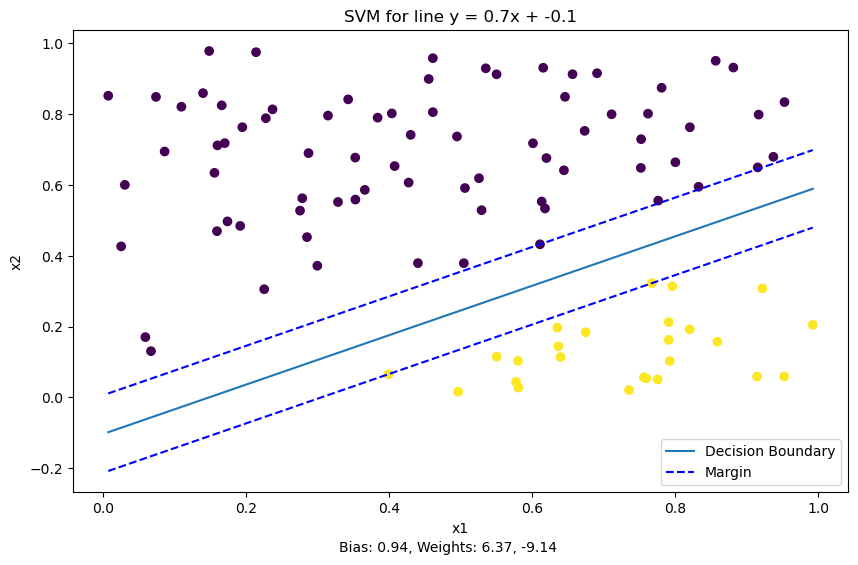

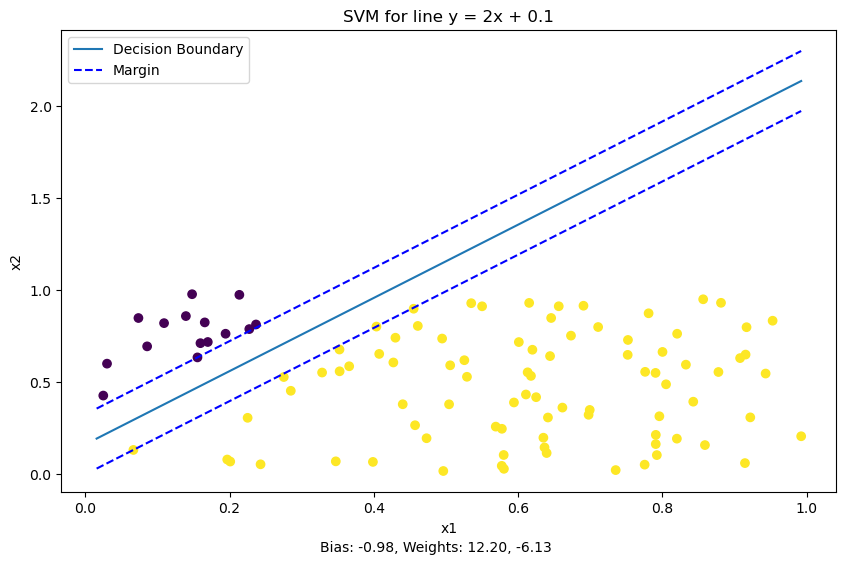

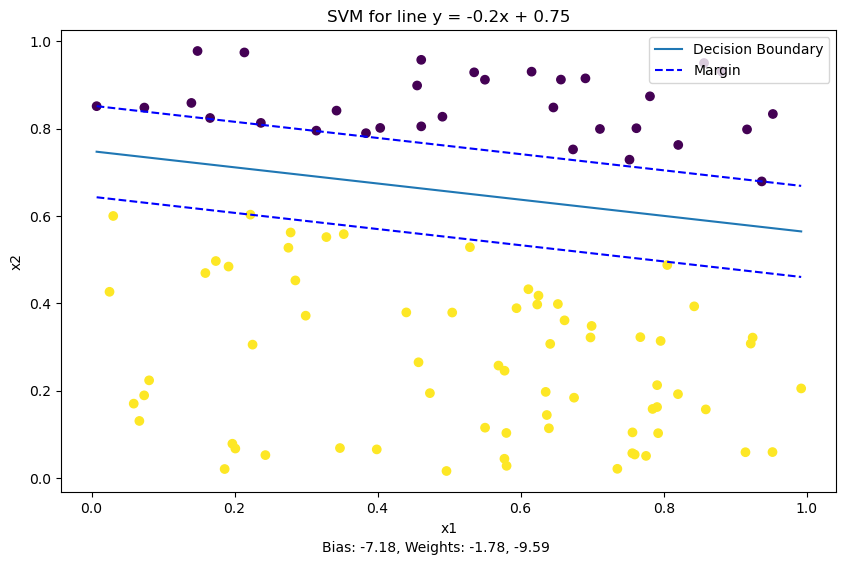

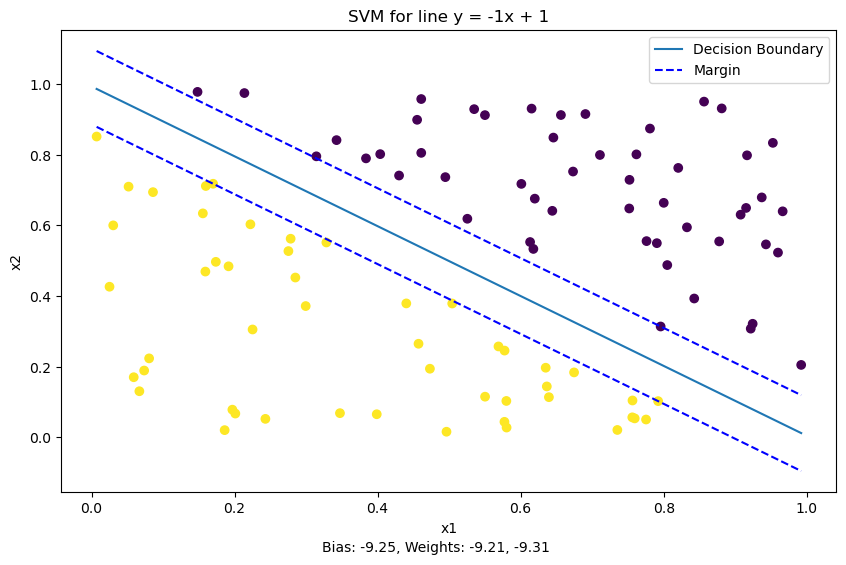

In [130]:
for line, (b, m) in zip(data, bms):
    x, y = line[:, 0:2], line[:, 2]
    hyperplane = Hyperplane()
    hyperplane.fit(x, y)

    plot_2d_hyperplane(x, y, hyperplane, f'SVM for line y = {m}x + {b}')